# Jupyter Notebooks (with STATA?!)

## What are Jupyter Notebooks?

- A way to do literate programming 
- Provide code and writing/analysis, on a language agnostic platform
    - Meaning that it is not restricted to just one language
    - Currently there are so-called kernels for many languages
    - Including Stata, Python, R, C, Golang, C++, Fortran and more coming!
- Uses the power of Markdown/Latex Math and Code to tell a story and provide an efficient workflow
- Convert into several different formats including Latex, HTML, Presentations etc...
- The Jupyter engine is also available in other text editors such as Atom and VS Code.
- And now available in STATA!

## Under the Hood

- Jupyter Notebooks are written in python and are themselves a JSON document

<img src="DeepinScreenshot_select-area_20190107171714.png" width=600>

- Which makes them suited for working on in a browser

## Extensions

- Jupyter can be made to be a full featured IDE (Integrated Development Environment)
- Which really means you can get all kinds of nifty things
    - Autocompletion
    - Multi-cursor support
    - Scratchpad 
    - Highlighting a selected word
    - Translation
    - Spellcheck

## Installing Extensions

- In order to do this, we need to go to our conda console and type:

```
 conda install -c conda-forge jupyter_contrib_nbextensions 
```

- And restart Jupyter

## Markdown

- Using the same idea as in markstat that Oscar showed you before.

## Showing Math

- It is possible to show math
    - $y_{it} = \alpha + \beta\cdot X$

## The Stata Kernel

- This is a relatively new kernel that is implemented by Kyle Barron, Mauricio Cáceres, and other contributors
    - It provides the ability to run code and show graphics, which was previously unavailable for Stata in Jupyter.
- Ironically, even though we are using Stata in these presentations, there are other, free, open-source languages that are just as good (if not more powerful) for which dynamic documents have existed for over a decade.
- As a small nudge towards getting you to try something like R or Python, here's an addendum that Kyle Barron wrote on this State_kernel page:


>As an ardent open-source advocate and someone who actively dislikes using Stata, it somewhat pains me that my work creates value for a proprietary, closed-source program. I hope that this program improves research in a utilitarian way, and shows to new users the scope of the open-source tools that have existed for upwards of a decade.

## Running Code

- In this case we will be using the Stata kernel, so we will have Stata running in the background.



In [18]:
sysuse auto
eststo: regress price weight mpg
eststo: regress price weight mpg foreign


(1978 Automobile Data)


      Source |       SS           df       MS      Number of obs   =        74
-------------+----------------------------------   F(2, 71)        =     14.74
       Model |   186321280         2  93160639.9   Prob > F        =    0.0000
    Residual |   448744116        71  6320339.67   R-squared       =    0.2934
-------------+----------------------------------   Adj R-squared   =    0.2735
       Total |   635065396        73  8699525.97   Root MSE        =      2514

------------------------------------------------------------------------------
       price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      weight |   1.746559   .6413538     2.72   0.008      .467736    3.025382
         mpg |  -49.51222   86.15604    -0.57   0.567    -221.3025     122.278
       _cons |   1946.069    3597.05     0.54   0.590    -5226.245    9118.382
-------------------------

## Stata Kernel Magics

- Many Jupyter kernels have something called magics
    - A way to make certain actions easy without having to write too much code
    - Stata has some magics that make things a little easier

## %browse, %head, %tail

- This has the ability to choose varlist, the number of observations and with `if` statements as well

In [21]:
%head

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign,_est_est3,_est_est4
1,AMC Concord,4099,22,3,2.5,11,2930,186,40,121,3.5799999,Domestic,1,1
2,AMC Pacer,4749,17,3,3,11,3350,173,40,258,2.53,Domestic,1,1
3,AMC Spirit,3799,22,.,3,12,2640,168,35,121,3.0799999,Domestic,1,1
4,Buick Century,4816,20,3,4.5,16,3250,196,40,196,2.9300001,Domestic,1,1
5,Buick Electra,7827,15,4,4,20,4080,222,43,350,2.4100001,Domestic,1,1
6,Buick LeSabre,5788,18,3,4,21,3670,218,43,231,2.73,Domestic,1,1
7,Buick Opel,4453,26,.,3,10,2230,170,34,304,2.8699999,Domestic,1,1
8,Buick Regal,5189,20,3,2,16,3280,200,42,196,2.9300001,Domestic,1,1
9,Buick Riviera,10372,16,3,3.5,17,3880,207,43,231,2.9300001,Domestic,1,1
10,Buick Skylark,4082,19,3,3.5,13,3400,200,42,231,3.0799999,Domestic,1,1


## %html and %latex

- This allows the rendering of table during export into html or latex, as well as rendering in the notebook (with HTML only)

In [32]:
%html
esttab, html

This front-end or document format cannot display HTML

## %help

- You can use this to get a help file

In [20]:
%help reg

This front-end cannot display HTML help.

In [31]:
%html
qui: ssc install outreg2
qui: regress price mpg weight
qui: estimates store reg1
*outreg2 using "regression.html", ctitle("OLS")  dec(4) bdec(4) tdec(4) rdec(4) alpha(.01, .05, .1) text replace 
esttab reg1, html

This front-end or document format cannot display HTML

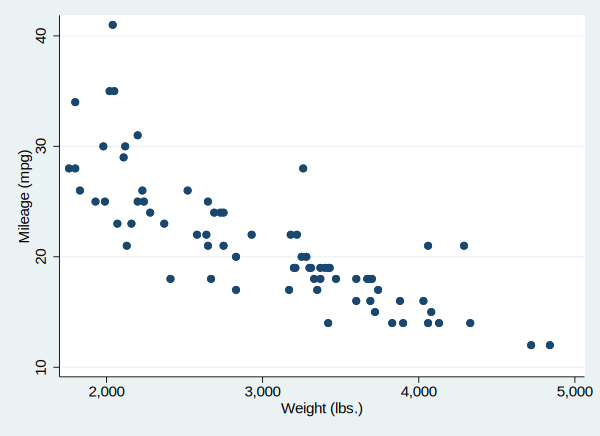

In [4]:
scatter mpg weight

## Exporting

## Using `ipypublish` to Get Publication Ready PDFs

- `ipypublish` is a utility developed for Jupyter Notebooks to make nice looking documents
- To get this working, we need to use `pip`
    - In the conda console, type `pip install ipypublish`
    - Hopefully it'll work 

- Doing this requires playing with the JSON code of a cell itself (called the metadata).
- This allows a subsequent PDF output to be processed through latex, without any code cells and with figure and table environments.

## Port-forwarding and setting up Jupyter to work on a server

- Many people might have servers in their universities/organizations that are more powerful than a laptop.
- Jupyter allows the ability to run a notebook locally (on your laptop screen), but using the power of the server.
    - This requires jupyter being installed on the server
    - This isn't a difficult thing to do for a sysadmin, so it's worth finding out whether that's possible

## Setting up jupyter on a server

- The first thing you need to do is log on to the server and start a jupyter instance:

`jupyter notebook --no-browser --port=8888`

- This tells the server to start an instance of jupyter, without a browser (we won't need it, nor can a server open up a browser window), in port 8888 (this will be important later)
- For Mac users, you can use `ssh` to finish the process. Just type:
`ssh username@host -L 8888:localhost:8888`
- Which will forward your computer 8888 port, to the server's 8888 port.

- For Windows, ssh also exists, but you will need to enable it.
    - head to Settings > Apps and click “Manage optional features” under Apps & features.
    - Click Add a Feature, and find OpenSSH
- Then use the same command as for Macs:
`ssh username@host -L 8888:localhost:8888`

- Then go to your browser:
    - `localhost:8888` and you should be taken to a Jupyter page and prompted for a token. 
    - You can find this token in the window where you started Jupyter on the server
        - Copy and paste this token into the prompt, and VOILA!
- Now you have Jupyter running on your computer's browser window, but with the power of the server!


## Advanced Techniques

- Jinja Templates
    - Allows the control of how a notebook is exported using the Jinja templating language
- Downloading new kernals (R, Python)
    - All the above applies (with even more features with Python)

## The Next Frontier

- Although Jupyter Notebooks are very popular and much science has been done with them (including an economics textbook: more [here](https://quantecon.org))
- the next generation Jupyter is Jupyter Lab, while allows extensions to be made better, and for the environment to be even better for data analysis.

In [26]:
local hello = 3

I have {{di "`hello'"}} kittens.